In [1]:
% reload_ext autoreload
% autoreload 2
% matplotlib inline
from IPython import display

import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import torchvision.models as models
import torch
from torch import nn
from torch.utils.data import DataLoader

import utils
import pipelines

C = utils.get_config('./myconfig.ini')

# Artstyle

The collection of WikiArt paintings cropped to `224x224` at the centre. See `MNIST.ipynb` for introduction.

In [2]:
traindata = pipelines.cropped.Data(root=C.paths.root, info_csv=C.paths.train_csv, train=True)

print('{} Instances. {} Classes'.format(len(traindata), len(traindata.encoder.classes_)))

79433 Instances. 136 Classes


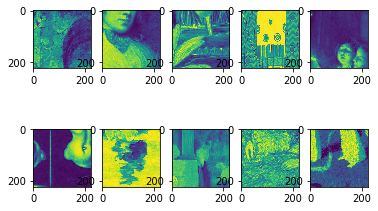

In [3]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=5)
for i, ax in enumerate((*row1, *row2)):
    x, y = traindata[4470+i]  # x.shape == (1, 28, 28), y.shape == (1,)
    ax.imshow(x[0])

#for i, (x,y) in enumerate(traindata):
#    if x.shape[0] != 3:
#        print('Removing image ' + str(i))
#        #del traindata[i]
#        #print('Converting image ' + str(i) + ' to 3 channel')

In [48]:
EPOCHS = 10
BATCH_SIZE = 10
LRATE = 1e-3
MOMENTUM = 0.9
USE_CUDA = True
N_CLASSES = len(traindata.encoder.classes_)
freeze_layers = False


model_conv = torchvision.models.alexnet(pretrained=True)

if freeze_layers:
    for i, param in model_conv.named_parameters():
        param.requires_grad = False


# Number of filters in the bottleneck layer
num_ftrs = model_conv.classifier[6].in_features
# convert all the layers to list and remove the last one
features = list(model_conv.classifier.children())[:-1]
## Add the last layer based on the num of classes in our dataset
features.extend([nn.Linear(num_ftrs, N_CLASSES)])
## convert it into container and add it to our model class.
model_conv.classifier = nn.Sequential(*features)

'''ct = []
for name, child in model_conv.named_children():
    if "Conv2d_4a_3x3" in ct:
        for params in child.parameters():
            params.requires_grad = True
    ct.append(name)

for name, child in model_conv.named_childeren():
    for name_2, params in child.named_parameters():
        print(name_2, params.requires_grad)'''

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_conv.parameters(), lr=LRATE, momentum=MOMENTUM)



model = pipelines.cropped.Model(net=model_conv, criterion=criterion, optimizer=optimizer, cuda=USE_CUDA)

In [ ]:
model.train(dataset=traindata, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch # 0
Min-batch #  100	 Loss: 3.889
Min-batch #  200	 Loss: 3.569
Min-batch #  300	 Loss: 3.445
Min-batch #  400	 Loss: 3.350
Min-batch #  500	 Loss: 3.362
Min-batch #  600	 Loss: 3.269
Min-batch #  700	 Loss: 3.236
Min-batch #  800	 Loss: 3.185
Min-batch #  900	 Loss: 3.237
Min-batch # 1000	 Loss: 3.165
Min-batch # 1100	 Loss: 3.193
Min-batch # 1200	 Loss: 3.179
Min-batch # 1300	 Loss: 3.195
Min-batch # 1400	 Loss: 3.200
Min-batch # 1500	 Loss: 3.164
Min-batch # 1600	 Loss: 3.103
Min-batch # 1700	 Loss: 3.138
Min-batch # 1800	 Loss: 3.166
Min-batch # 1900	 Loss: 3.073
Min-batch # 2000	 Loss: 3.109
Min-batch # 2100	 Loss: 3.166
Min-batch # 2200	 Loss: 3.095
Min-batch # 2300	 Loss: 3.026
Min-batch # 2400	 Loss: 3.129
Min-batch # 2500	 Loss: 3.030
Min-batch # 2600	 Loss: 3.011
Min-batch # 2700	 Loss: 2.990
Min-batch # 2800	 Loss: 2.989
Min-batch # 2900	 Loss: 3.005
Min-batch # 3000	 Loss: 3.141
Min-batch # 3100	 Loss: 2.987
Min-batch # 3200	 Loss: 3.074
Min-batch # 3300	 Loss: 3.016
